<a href="https://colab.research.google.com/github/JuanRenza/Imagenes/blob/master/TallerV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER CLASES VIRTUALES 1



**ACCESO AL DRIVE**




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**LIBRERIAS Y METODOS**

In [17]:
#Importo las librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os


%matplotlib inline
%cd /content/drive/My Drive/colab/Taller_1

def get_image(image_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  return image

def plotHist(img,hist):
  plt.figure(figsize=(15,1.5))
  plt.subplot(121), plt.imshow(img, cmap='gray')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.plot(hist, color='gray')
  plt.xlabel('Intensidad de iluminacion')
  plt.ylabel('cantidad de pixeles')
  plt.show()

def plotEq(img):

  imgEq = cv2.equalizeHist(img)

  hist = cv2.calcHist([img], [0], None, [256], [0,255])
  histEq = cv2.calcHist([imgEq], [0], None, [256], [0,255])

  plt.figure(figsize=(15,3))
  plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title("Antes")
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.plot(hist, color='gray')
  plt.xlabel('Intensidad de iluminacion')
  plt.ylabel('cantidad de pixeles')
  plt.subplot(223), plt.imshow(imgEq, cmap='gray'), plt.title("Despues")
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.plot(histEq, color='gray')
  plt.xlabel('Intensidad de iluminacion')
  plt.ylabel('cantidad de pixeles')
  plt.show()

def plotMask(img, mask):
  masked_img = cv2.bitwise_and(img,img,mask = mask)

  #Calcular histograma con y sin mascara
  hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
  hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])

  plt.figure(figsize=(12,4))
  plt.subplot(221), plt.imshow(img, cmap='gray')
  plt.subplot(222), plt.imshow(mask, cmap='gray')
  plt.subplot(223), plt.imshow(masked_img, cmap='gray')
  plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
  plt.show()

/content/drive/My Drive/colab/Taller_1


**CREACION DE GRUPOS**

In [0]:
imagesG1 = []
imagesG2 = []
imagesG3 = []

IMAGE_DIRECTORY='/content/drive/My Drive/colab/Taller_1'

for file in os.listdir(IMAGE_DIRECTORY):
  #Si no empieza con un punto
  if file.endswith('grupo1.jpg') or file.endswith('grupo1.png') or file.endswith('grupo1.jpeg'):
    imagesG1.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
  if file.endswith('grupo2.jpg') or file.endswith('grupo2.png') or file.endswith('grupo2.jpeg'):
    imagesG2.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
  if file.endswith('grupo3.jpg') or file.endswith('grupo3.png') or file.endswith('grupo3.jpeg'):
    imagesG3.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))


**HISTOGRAMAS DEL GRUPO UNO**

El grupo de imagenes contiene imagenes muy brillantes debido a la acumulacion de los pixeles en tonalidades cercanas al blanco (255), presentan sobreexposicion y la mayoria presenta un muy bajo contraste. 

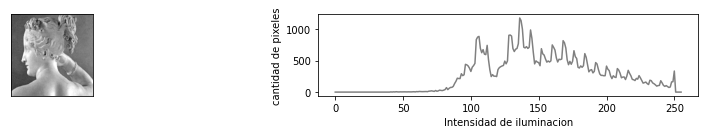

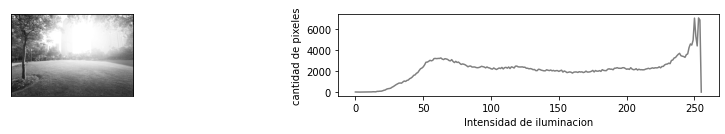

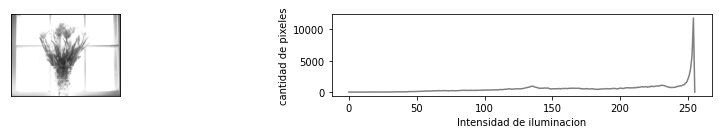

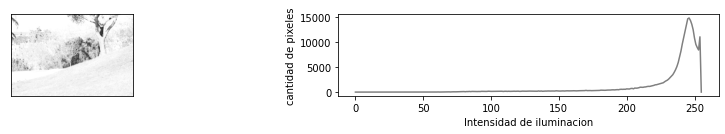

In [5]:
for i in range (len(imagesG1)):
  img = imagesG1[i]
  leng = len(imagesG1)
  hist = cv2.calcHist([img], [0], None, [256], [0,255])
  plotHist(img,hist)

**HISTOGRAMAS DEL GRUPO DOS**

El grupo de imagenes contiene imagenes muy oscuras debido a la acumulacion de los pixeles en tonalidades cercanas al negro(0), presentan subexposicion y la mayoria presenta un muy bajo contraste. 

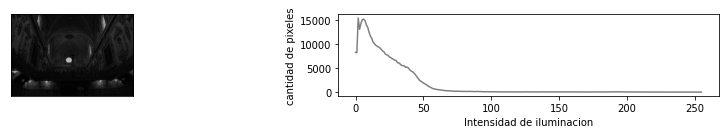

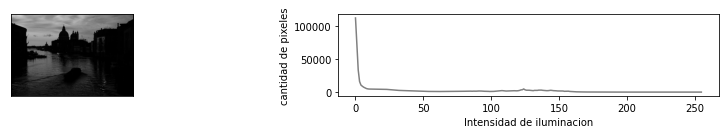

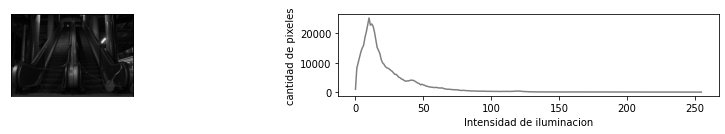

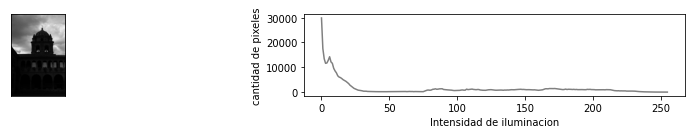

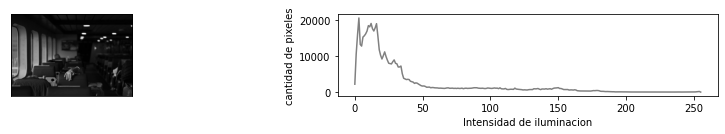

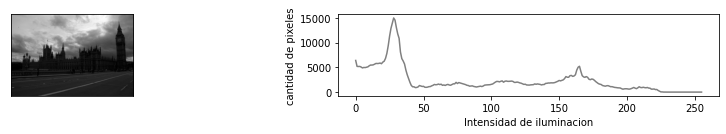

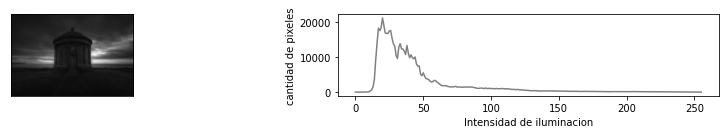

In [7]:
for i in range (len(imagesG2)):
  img = imagesG2[i]
  leng = len(imagesG2)
  hist = cv2.calcHist([img], [0], None, [256], [0,255])
  plotHist(img,hist)

**HISTOGRAMAS DEL GRUPO TRES**

El grupo de imagenes contiene imagenes sobre y subexpuestas, con picos de tonalidad y la mayoria presenta un muy bajo contraste. 

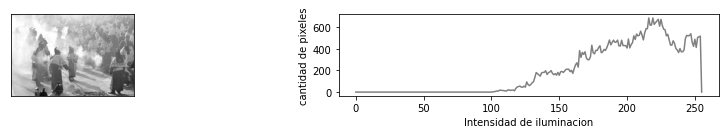

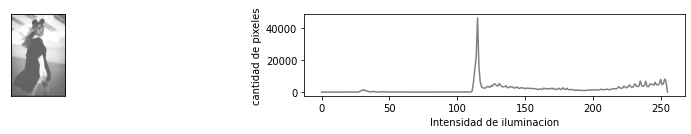

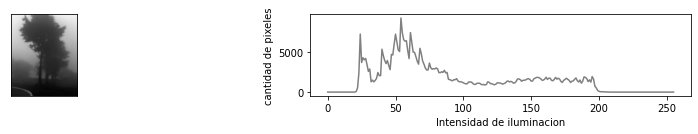

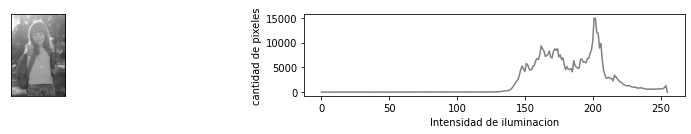

In [9]:
for i in range (len(imagesG3)):
  img = imagesG3[i]
  leng = len(imagesG3)
  hist = cv2.calcHist([img], [0], None, [256], [0,255])
  plotHist(img,hist)

**EQUALIZACIÓN DEL GRUPO UNO**

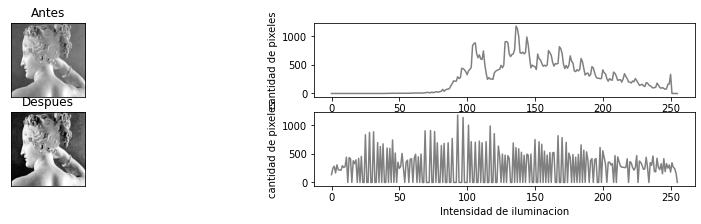

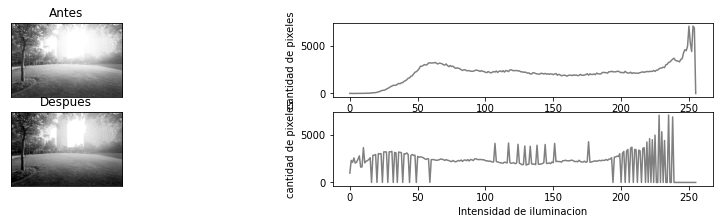

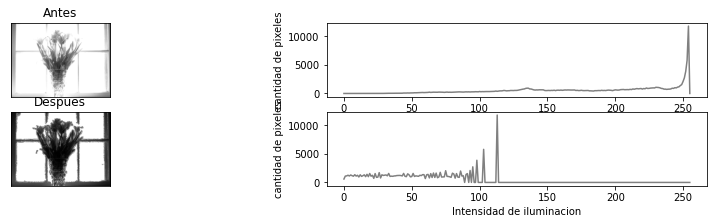

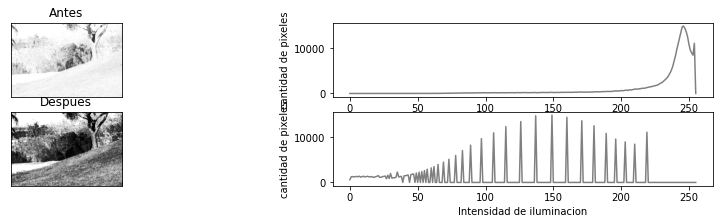

In [12]:
for i in range (len(imagesG1)):
  img = imagesG1[i]
  plotEq(img)

**EQUALIZACIÓN DEL GRUPO DOS**

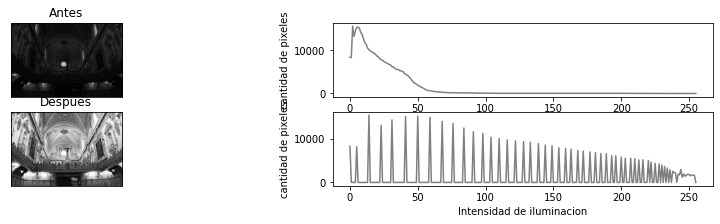

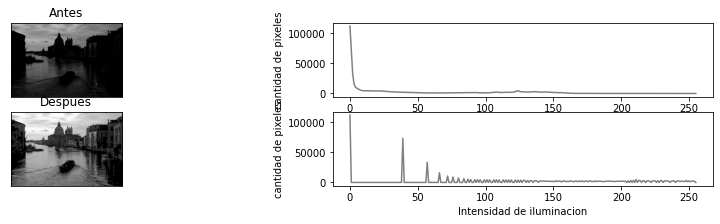

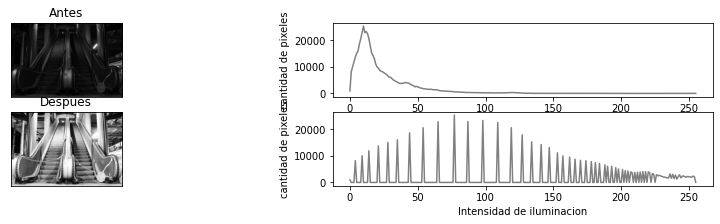

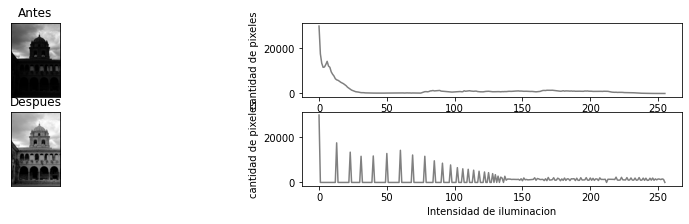

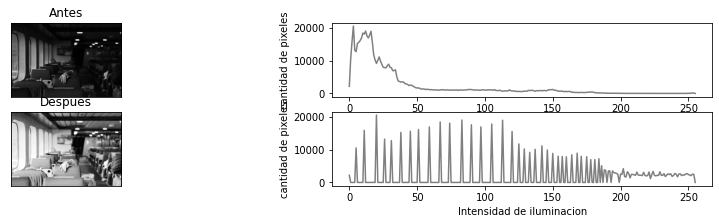

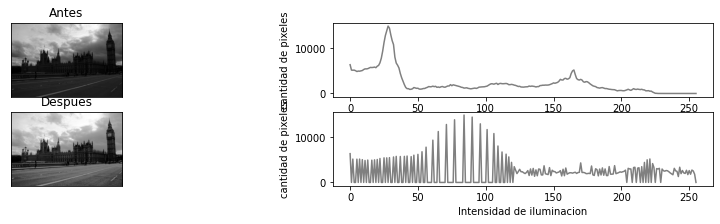

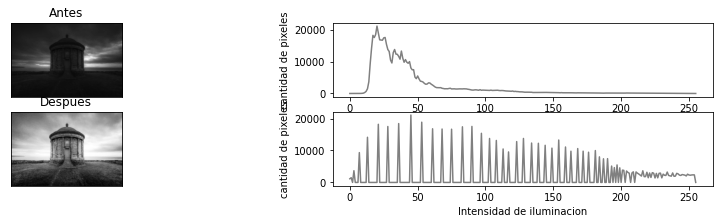

In [13]:
for i in range (len(imagesG2)):
  img = imagesG2[i]
  plotEq(img)

**EQUALIZACIÓN DEL GRUPO TRES**

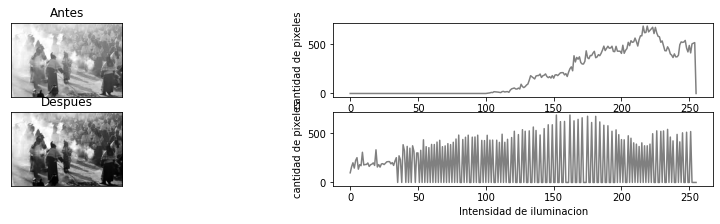

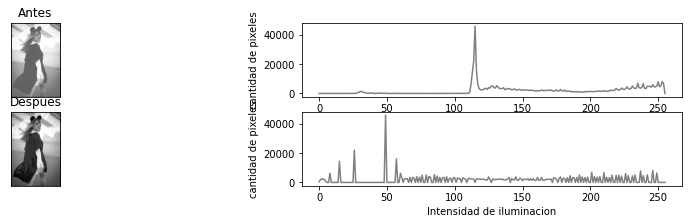

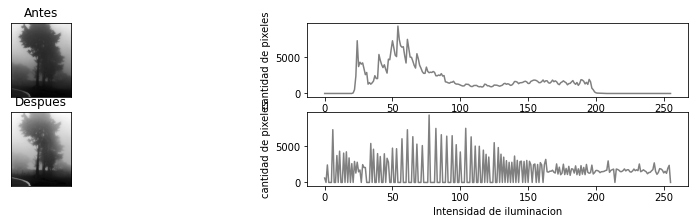

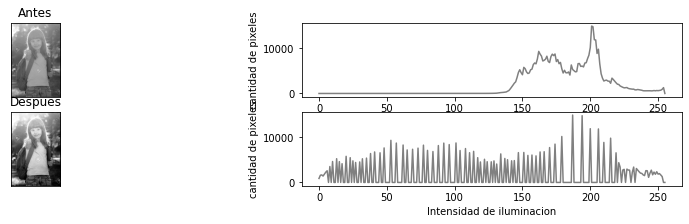

In [14]:
for i in range (len(imagesG3)):
  img = imagesG3[i]
  plotEq(img)

**IMAGENES ENMASCARADAS**

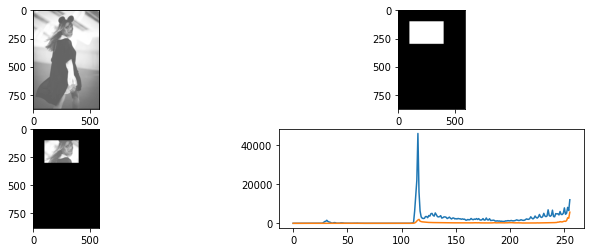

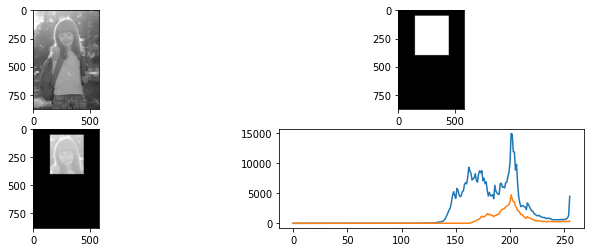

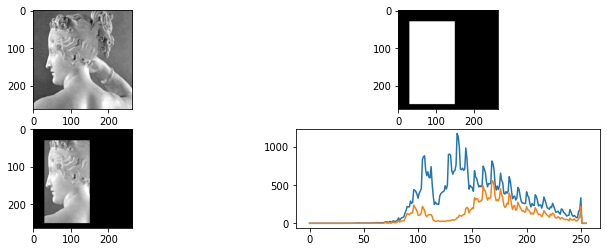

In [28]:
  img = imagesG3[1]
  # Crear Mascara vacia, darle valores y unirla con la imagen principal en masked:img
  mask = np.zeros(img.shape[:2], np.uint8)
  mask[100:300, 100:400] = 255

  plotMask(img, mask)

  img = imagesG3[3]
  # Crear Mascara vacia, darle valores y unirla con la imagen principal en masked:img
  mask = np.zeros(img.shape[:2], np.uint8)
  mask[50:400, 150:450] = 255

  plotMask(img, mask)

  img = imagesG1[0]
  # Crear Mascara vacia, darle valores y unirla con la imagen principal en masked:img
  mask = np.zeros(img.shape[:2], np.uint8)
  mask[30:250, 30:150] = 255

  plotMask(img, mask)